In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from math import factorial
from numpy.random import binomial

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [3]:
def my_binomial(k,n,p):
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)

In [4]:
my_binomial(2,3,0.5)

0.375

In [5]:
dist = binom(3, 0.5) # Esto es una clase, por eso definimos sus parametros de n y de p
dist.pmf(2) #p(x=2) -> mass probability function

0.3750000000000001

In [8]:
dist.cdf(2) #cumulative density function or funcion de densidad acumulada

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [22]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p) # viene de numpy.random

2

In [23]:
arr = []
for _ in range(100):
    arr.append(binomial(n,p))

In [25]:
def plot_hist(num_trials):
    """
    num_trials: is the number of samples
    The code run a np.random.binomial with parameters n=3 and p=0.5 a num_trials times
    Next, we calculate the teorical probability of get each possible value and we compare
    It show us, that the higher num_trials the closer the simulation with the teorical values
    """
    values = [0,1,2,3]
    arr = []
    for _ in range(num_trials):
        arr.append(binomial(n,p))
    sim = np.unique(arr, return_counts=True)[1]/len(arr)
    teorica = [binom(3, 0.5).pmf(k) for k in values]
    plt.bar(values,sim, color = 'red')
    plt.bar(values, teorica, alpha=0.5, color = 'blue')
    plt.title('{} experimentos'.format(num_trials))
    plt.show()

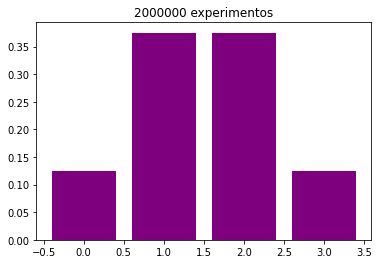

In [29]:
plot_hist(2000000)